In [1]:
!pip install xgboost


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor

In [4]:
train = pd.read_csv(r"C:\Users\Lenovo\Downloads\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"C:\Users\Lenovo\Downloads\house-prices-advanced-regression-techniques\test.csv")


In [5]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


In [6]:
y = np.log1p(train['SalePrice'])
train_ID = train['Id']
test_ID = test['Id']

In [7]:
train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [8]:
combined = pd.concat([train, test], axis=0)
print("Combined shape:", combined.shape)


Combined shape: (2919, 79)


In [9]:
num_cols = combined.select_dtypes(include=np.number).columns
cat_cols = combined.select_dtypes(include='object').columns

In [10]:
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [11]:
combined[num_cols] = imputer_num.fit_transform(combined[num_cols])
combined[cat_cols] = imputer_cat.fit_transform(combined[cat_cols])

In [12]:
combined = pd.get_dummies(combined, drop_first=True)
print("Encoded shape:", combined.shape)

Encoded shape: (2919, 245)


In [13]:
X = combined.iloc[:len(y), :]
X_test = combined.iloc[len(y):, :]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
y_pred_log = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_log))
print(f"Log-Transformed Validation RMSE (Kaggle metric): {val_rmse:.5f}")

Log-Transformed Validation RMSE (Kaggle metric): 0.14274


In [19]:
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

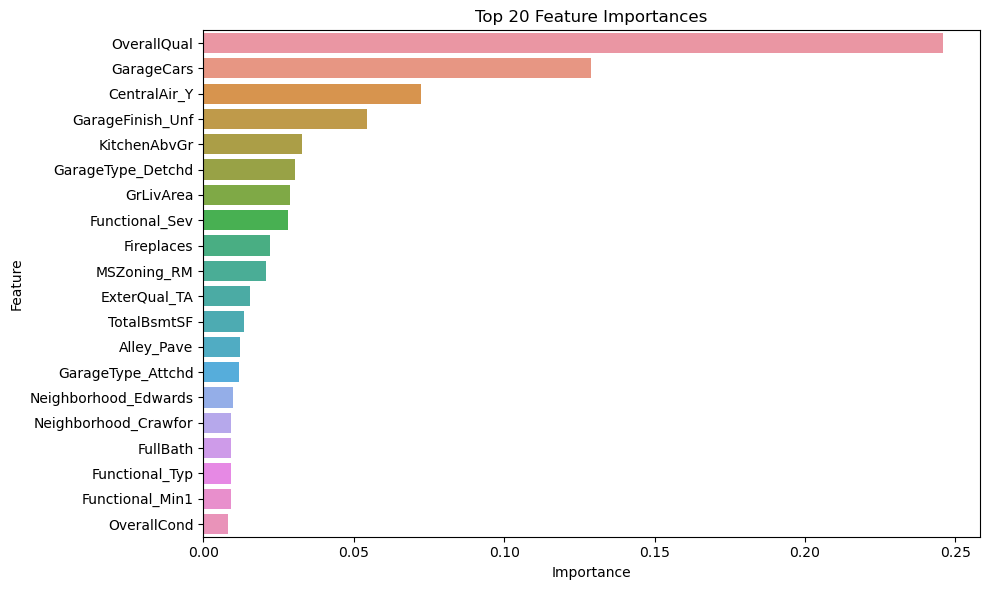

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [21]:
test_preds_log = model.predict(X_test)
test_preds = np.expm1(test_preds_log)

In [22]:
submission_df = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': test_preds
})

In [23]:
submission_df.to_csv("submission.csv", index=False)
print(" Submission file saved as 'submission.csv'")

submission_df.head(10)

 Submission file saved as 'submission.csv'


,Id,SalePrice
0,1461,117989.679688
1,1462,154339.953125
2,1463,184581.125000
3,1464,190238.703125
4,1465,196723.203125
5,1466,179896.156250
6,1467,177513.109375
7,1468,169772.437500
8,1469,178560.875000
9,1470,119999.304688
